# Movie Review Sentiment Classification Challenge

This dataset contains movie reviews along with their associated binary sentiment polarity labels. It is intended to serve as a benchmark for sentiment classification.

The objective of this challenge is to, given a sentence, classify whether the sentence is of positive, negative, or neutral sentiment. For messages conveying both a positive and negative sentiment, whichever is the stronger sentiment should be chosen. Predict if the text would be considered positive, negative, or neutral (for an average user). This is a binary task.


Please, [go to the website and sign-in](https://huggingface.co/) to access all the features of the platform.

[Read more about Text classification with Hugging Face](https://huggingface.co/tasks/text-classification)

The Hugging face models are Deep Learning based, so will need a lot of computational GPU power to train them. Please use [Colab](https://colab.research.google.com/) to do it, or your other GPU cloud provider, or a local machine having NVIDIA GPU.

## Application of Hugging Face Text classification model Fune-tuning

## **Text Processing terms**

### 1. Segmentation

**Definition**: Segmentation is the process of dividing a large chunk of text into smaller units like sentences or paragraphs.



### 2. Tokenization

**Definition**: Tokenization is the process of breaking down text into smaller pieces, commonly known as tokens. These tokens are typically words or subwords.



To handle these stages, you might need to install and download certain resources from `nltk`. This can be done using:

```python
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
```


Find below a simple example, with just `3 epochs of fine-tuning`.



In [1]:
!pip install accelerate>=0.20.1 -U
!pip install transformers[torch] -U
!pip install transformers
!pip install contractions
!pip install datasets
!pip install nltk wordcloud

!pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.7 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords


from huggingface_hub import notebook_login

notebook_login()

In [3]:
# OS functions for interacting with the operating system
import os

# Data analysis and manipulation tool

import numpy as np
# importation

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet


from matplotlib import axes
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
import re,string, unicodedata
from nltk.tokenize import word_tokenize


from string import punctuation
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings("ignore")
import string

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Library to load datasets
from datasets import load_dataset

# Function to split datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Mount Google Drive in Google Colab
from google.colab import drive

# Data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Regular expression operations
import re

# Natural Language Toolkit for text processing
import nltk

# Set of common words that may not contain significant meaning in text processing
from nltk.corpus import stopwords

# Another collection of English stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Download necessary NLTK resources: stopwords and wordnet for lemmatization
nltk.download('stopwords')
nltk.download('wordnet')

# Text normalization: lemmatization using WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud
# Library for expanding contractions (e.g., "don't" to "do not")
import contractions

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, load_metric
import os
import torch
from transformers import RobertaForSequenceClassification
from sklearn.utils.class_weight import compute_class_weight
from torch.nn import CrossEntropyLoss
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Mounting Google Drive to access files in '/content/drive'
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [6]:
# Load the dataset
# url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_P5-NLP/master/zindi_challenge/data/Train.csv'

# Load the dataset and display some values
df_train= pd.read_csv('/content/drive/MyDrive/datasets/Train.csv')
df_test= pd.read_csv('/content/drive/MyDrive/datasets/Test.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/datasets/SampleSubmission.csv')

In [7]:
df_train.head()

,review_file,content,sentiment
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive
1,9693_8.txt,I was very surprised with this film. I was tou...,positive
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive


In [8]:
df_test.head()

,review_file,content
0,0_10.txt,I went and saw this movie last night after bei...
1,0_2.txt,Once again Mr. Costner has dragged out a movie...
2,10000_4.txt,This is an example of why the majority of acti...
3,10000_7.txt,Actor turned director Bill Paxton follows up h...
4,10001_1.txt,"First of all I hate those moronic rappers, who..."


In [9]:
sample_submission.head()

,review_file,sentiment
0,0_10.txt,negative
1,0_2.txt,negative
2,10000_4.txt,negative
3,10000_7.txt,negative
4,10001_1.txt,negative


In [10]:
df_train.tail() # Displaying the last 5 rows of the DataFrame

,review_file,content,sentiment
24995,2791_3.txt,"As with most of the reviewers, I saw this on S...",negative
24996,644_9.txt,A have a female friend who is currently being ...,positive
24997,4921_8.txt,Like A Streetcar Named Desire (also directed b...,positive
24998,5791_1.txt,"As a Native film professor, I can honestly say...",negative
24999,8997_10.txt,I've seen this movie on several different occa...,positive


In [11]:
df_train.info() # Displaying information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_file  25000 non-null  object
 1   content      25000 non-null  object
 2   sentiment    25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB


In [12]:
df_train.isnull().sum() # checking for null values

review_file    0
content        0
sentiment      0
dtype: int64

In [13]:
df_train.shape

(25000, 3)

In [14]:
# eliminating rows containing NaN values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_file  25000 non-null  object
 1   content      25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [15]:
df_test.isnull().sum()

review_file    0
content        0
dtype: int64

In [16]:
df_test.shape

(25000, 2)

In [17]:
# finding the frequency of the unique vales in the target
df_train['sentiment'].value_counts()

positive    12500
negative    12500
Name: sentiment, dtype: int64

In [18]:
# making a copy
train_df=df_train.copy()
test_df= df_test.copy()

# Map values in 'sentiment' to 1 for 'positive' and 0 for 'negative'
train_df['label'] = train_df['sentiment'].map({'positive': 1, 'negative': 0})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_file  25000 non-null  object
 1   content      25000 non-null  object
 2   sentiment    25000 non-null  object
 3   label        25000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 781.4+ KB


In [19]:
# Create a dictionary 'df' with two datasets: 'train_df' and 'test_df'
df = {'train_df': train_df, 'test_df': test_df}

# Iterate over each dataset in the dictionary and print its statistical description
for name, dataset in df.items():
    # Print a header indicating the dataset's name
    print(f'The statistical description of the', name, "dataset :", "\n\n")

    # Use describe() to generate a statistical description of the dataset,
    # transpose (T) it for better readability, and print it
    print(dataset.describe().T, "\n\n", "---" * 25)


The statistical description of the train_df dataset : 


         count  mean      std  min  25%  50%  75%  max
label  25000.0   0.5  0.50001  0.0  0.0  0.5  1.0  1.0 

 ---------------------------------------------------------------------------
The statistical description of the test_df dataset : 


             count unique                                                top  \
review_file  25000  25000                                           0_10.txt   
content      25000  24801  Loved today's show!!! It was a variety and not...   

            freq  
review_file    1  
content        5   

 ---------------------------------------------------------------------------


In [20]:
# Check for duplicates in the 'content' column of the train_df and test_df DataFrames
# Count the number of duplicated rows in each DataFrame

# Count duplicated rows in the 'content' column of the train_df DataFrame
duplicate_train = train_df['content'].duplicated().sum()

# Count duplicated rows in the 'content' column of the test_df DataFrame
duplicate_test = test_df['content'].duplicated().sum()

# Print the number of duplicated rows found in each dataset
print('There are', duplicate_train, 'duplicated rows for the training set')
print('There are', duplicate_test, 'duplicated rows for the test set')

There are 96 duplicated rows for the training set
There are 199 duplicated rows for the test set


In [21]:
# Drop duplicated rows in the train_df DataFrame based on the 'content' column,
# keeping only the first occurrence of each duplicated content
train_df = train_df.drop_duplicates(subset='content', keep='first')

# Reset the index of the DataFrame after dropping duplicates
train_df = train_df.reset_index(drop=True)

# Select and retain only the 'review_file', 'content', 'sentiment', and 'label' columns in the DataFrame
train_df = train_df[['review_file', 'content', 'sentiment', 'label']]

# Display the first few rows of the modified train_df DataFrame
train_df.head()

,review_file,content,sentiment,label
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive,1
1,9693_8.txt,I was very surprised with this film. I was tou...,positive,1
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative,0
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive,1
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive,1


In [22]:
# Drop duplicated rows in the test_df DataFrame based on the 'content' column,
# keeping only the first occurrence of each duplicated content
test_df = test_df.drop_duplicates(subset='content', keep='first')

# Reset the index of the DataFrame after dropping duplicates
test_df = test_df.reset_index(drop=True)

# Select and retain only the 'review_file' and 'content' columns in the DataFrame
test_df = test_df[['review_file', 'content']]

# Display the first few rows of the modified test_df DataFrame
test_df.head()

,review_file,content
0,0_10.txt,I went and saw this movie last night after bei...
1,0_2.txt,Once again Mr. Costner has dragged out a movie...
2,10000_4.txt,This is an example of why the majority of acti...
3,10000_7.txt,Actor turned director Bill Paxton follows up h...
4,10001_1.txt,"First of all I hate those moronic rappers, who..."


In [23]:
# checking again whether, there are duplicates
#Check for duplicates
duplicate_train = train_df['content'].duplicated().sum()
duplicate_test = test_df['content'].duplicated().sum()
print('There are ',duplicate_train,' duplicated rows for the training set')
print('There are ',duplicate_test,' duplicated rows for the test set')

There are  0  duplicated rows for the training set
There are  0  duplicated rows for the test set


In [24]:
def find_skewness(train_df,test_df):
  for i in find_skewness:
    print(find_skewness.skew(numeric_only=True))

# Calculate skewness for train_df
train_df_skew = train_df.skew()

# Calculate skewness for test_df
test_df_skew = test_df.skew()

# Display the skewness values
print("Skewness of train_df:")
print(train_df_skew)

print("\nSkewness of test_df:")
print(test_df_skew)

Skewness of train_df:
label   -0.003213
dtype: float64

Skewness of test_df:
Series([], dtype: float64)


<Axes: ylabel='Density'>

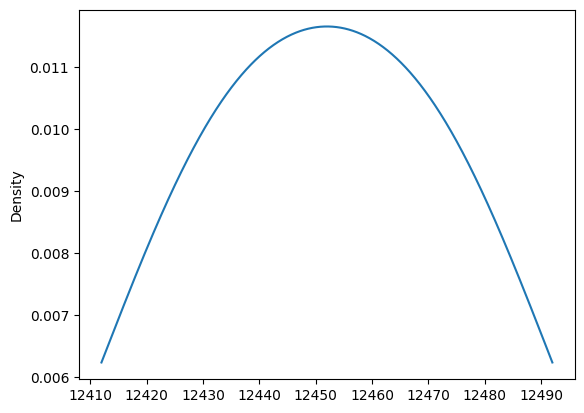

In [25]:
# Calculate the value counts of the 'sentiment' column in the train_dfDataFrame
# and create a kernel density estimation (KDE) plot to visualize the distribution
train_df['sentiment'].value_counts().plot(kind='kde')

In [26]:
# visualizing the percentage unique values of the target  features.
fig_1 = px.pie(train_df, names='sentiment', title='Plot of percentage of Sentiment')
iplot(fig_1)

In [27]:

fig_3 = px.histogram(
    data_frame=train_df,
    x='sentiment',
    color="sentiment",
    facet_col="sentiment",
    title="Count of Sentiment"
)

# Display the histogram
fig_3.show()

In [28]:
# Calculate the number of characters in the 'content' column of the train_df DataFrame
train_df['characters_in_content'] = train_df['content'].str.len()

In [29]:
train_df.head()

,review_file,content,sentiment,label,characters_in_content
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive,1,991
1,9693_8.txt,I was very surprised with this film. I was tou...,positive,1,655
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative,0,870
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive,1,1617
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive,1,515


In [30]:
# Create a histogram using Plotly Express (px) for the 'characters_in_content' column of the train_df DataFrame
fig_4 = px.histogram(data_frame=train_df, x="characters_in_content", title="number of Characters Present in content")

# Display the histogram
fig_4.show()


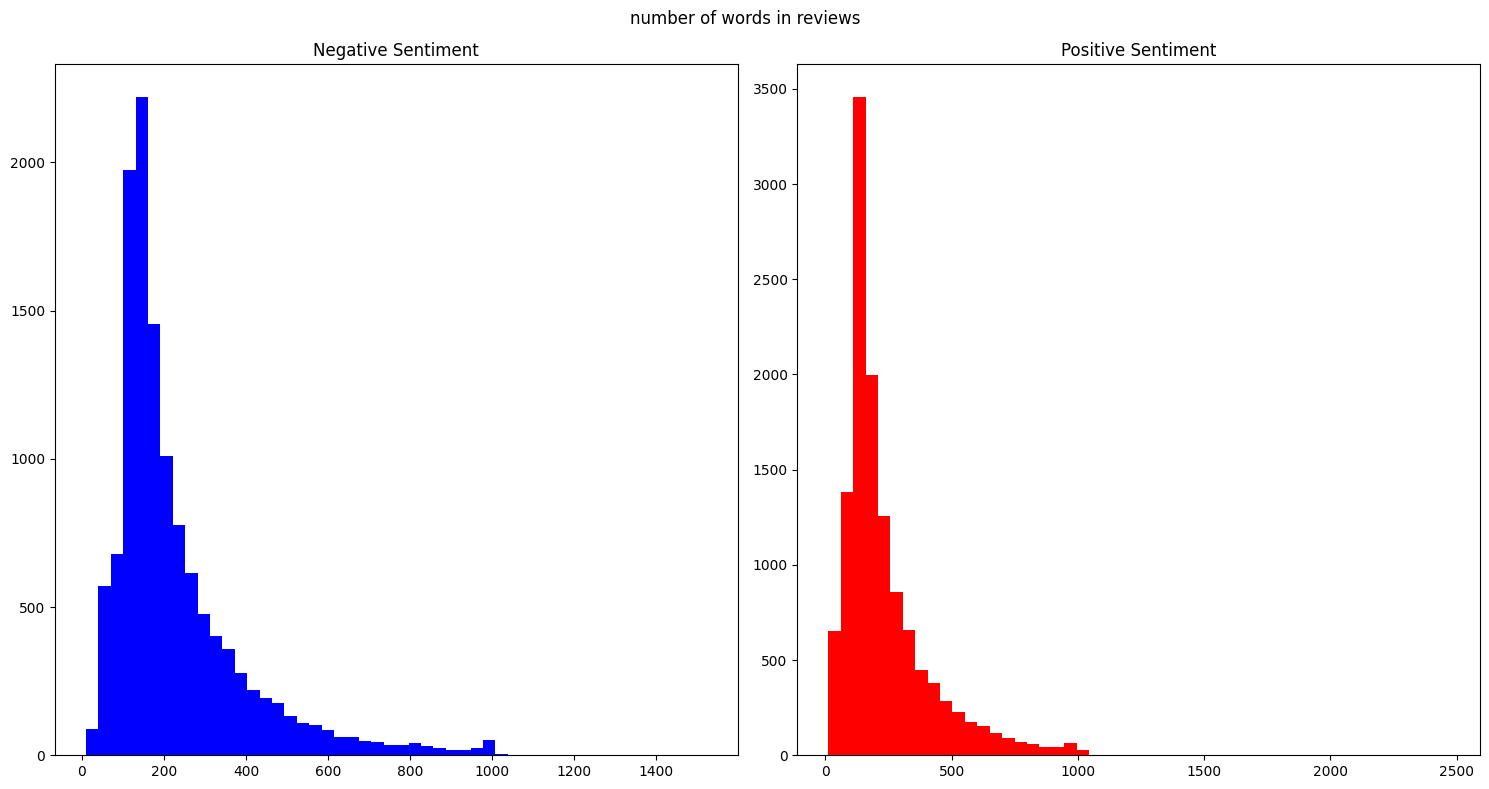

In [31]:
# Create a figure with 1 row and 2 columns of subplots and set the figure size
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plot a histogram of the number of words in reviews with 'Negative Sentiment' (label == 0)
ax1.hist(train_df[train_df['label'] == 0]['content'].str.split().map(lambda x: len(x)), bins=50, color='b')
ax1.set_title('Negative Sentiment')  # Set the title for the left subplot

# Plot a histogram of the number of words in reviews with 'Positive Sentiment' (label == 1)
ax2.hist(train_df[train_df['label'] == 1]['content'].str.split().map(lambda x: len(x)), bins=50, color='r')
ax2.set_title('Positive Sentiment')  # Set the title for the right subplot

# Set a super title for the entire figure
f.suptitle('number of words in reviews')

# Adjust the layout of subplots to prevent overlap
plt.tight_layout()

# Display the figure with the histograms
plt.show()


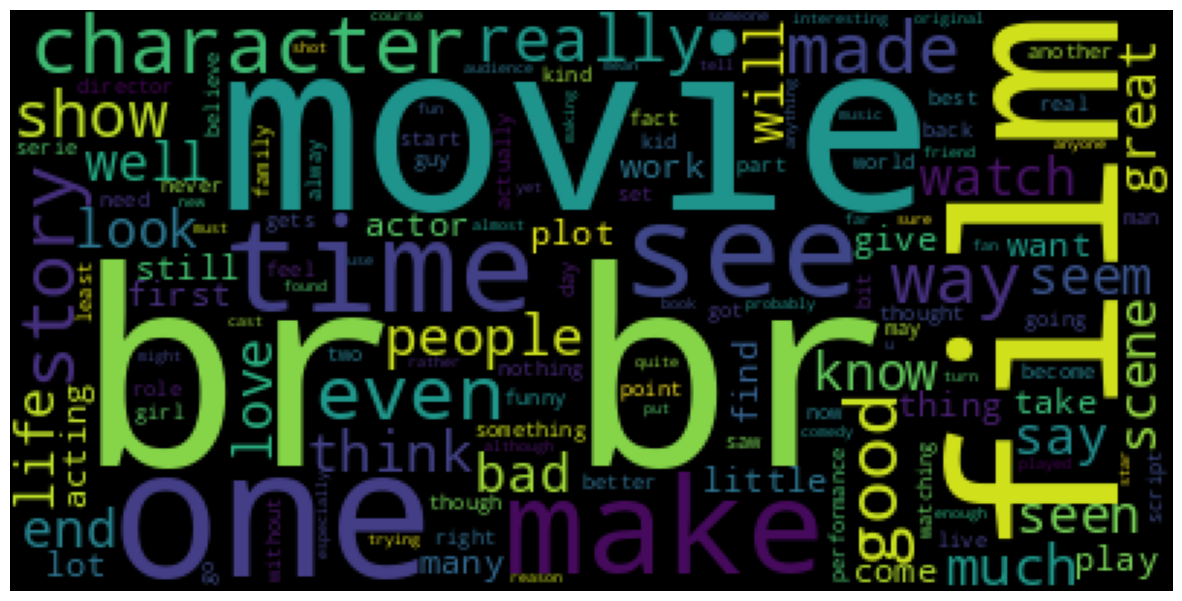

In [32]:
# Select the "clean_tweet" column from the train_df DataFrame
train_content = train_df["content"]

# Convert all the cleaned tweets into a single string by joining them
train_text = " ".join(train_content)

# Create a WordCloud object and generate the word cloud from the combined text
wc_train = WordCloud().generate(train_text)

# Set the figure size for the plot
plt.figure(figsize=(15, 10))

# Display the generated word cloud using plt.imshow()
plt.imshow(wc_train)

# Turn off the axis to remove axes labels
plt.axis("off")

# Display the word cloud plot
plt.show()

In [33]:
# maximum number of words in content
train_df['content'].str.split().map(lambda x: len(x)).max()

2470

In [34]:
# minimum number of words in content
train_df['content'].str.split().map(lambda x: len(x)).min()

10

In [35]:
# Apply a lowercase transformation to all elements in the train_df DataFrame
train_df = train_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Apply a lowercase transformation to all elements in the test_df DataFrame
test_df = test_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [36]:
# Convert the 'content' column in the train_df DataFrame to a single string
train_df['content'] = train_df['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Convert the 'content' column in the test_df DataFrame to a single string
test_df['content'] = test_df['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [37]:
train_df.head()

,review_file,content,sentiment,label,characters_in_content
0,3471_8.txt,recently shown on cable tv the movie opens wit...,positive,1,991
1,9693_8.txt,i was very surprised with this film. i was tou...,positive,1,655
2,10801_1.txt,"now, i'm one to watch movies that got poor rev...",negative,0,870
3,9592_8.txt,"this film came out 12 years years ago, and was...",positive,1,1617
4,8514_7.txt,"when an orphanage manager goes on vacation, hi...",positive,1,515


In [38]:
train_df.drop(['review_file', 'sentiment', 'characters_in_content'], axis=1, inplace=True)

In [39]:
# Define a function to replace URLs in a DataFrame column
def replace_url(df, column):
    # Use regular expression to replace URLs in the 'content' column with 'urlweb'
    dfurl = train_df['content'].str.replace(r'http.?://[^\s]+[\s]?', 'urlweb ')
    return dfurl

# Apply the 'replace_url' function to the 'clean_content' column of the train_df DataFrame
train_df['clean_text'] = replace_url(train_df, 'clean_text')

# Apply the 'replace_url' function to the 'clean_content' column of the test_df DataFrame
test_df['clean_text'] = replace_url(test_df, 'clean_text')

In [40]:
# Define a function to remove digits from a DataFrame column
def remove_digits(df, column):
    # Use a lambda function and regular expression to remove digits from the 'content' column
    digits = df[column].apply(lambda x: re.sub(r'\d', '', x))
    return digits

# Apply the 'remove_digits' function to the 'clean_text' column of the train_df DataFrame
train_df['clean_text'] = remove_digits(train_df, 'clean_text')

# Apply the 'remove_digits' function to the 'clean_text' column of the test_df DataFrame
test_df['clean_text'] = remove_digits(test_df, 'clean_text')


In [41]:
# Define a function to remove punctuations from a given text using regular expressions
def punctuation_remover(text):
    return re.sub("[^\w\s]", repl=" ", string=text)

# Apply the 'punctuation_remover' function to the 'content' column in train_df
train_df["clean_text"] = train_df["content"].apply(punctuation_remover)

# Apply the 'punctuation_remover' function to the 'content' column in test_df
test_df["clean_text"] = test_df["content"].apply(punctuation_remover)

In [42]:
train_df['clean_text'].head()

0    recently shown on cable tv the movie opens wit...
1    i was very surprised with this film  i was tou...
2    now  i m one to watch movies that got poor rev...
3    this film came out 12 years years ago  and was...
4    when an orphanage manager goes on vacation  hi...
Name: clean_text, dtype: object

In [43]:
   train_df['clean_text'].head()

0    recently shown on cable tv the movie opens wit...
1    i was very surprised with this film  i was tou...
2    now  i m one to watch movies that got poor rev...
3    this film came out 12 years years ago  and was...
4    when an orphanage manager goes on vacation  hi...
Name: clean_text, dtype: object

In [44]:
new_dataset = train_df.copy()
new_dataset.to_csv('movie_review_dataset.csv', index=False)

In [45]:
final=pd.read_csv('movie_review_dataset.csv')
final.head()

,content,label,clean_text
0,recently shown on cable tv the movie opens wit...,1,recently shown on cable tv the movie opens wit...
1,i was very surprised with this film. i was tou...,1,i was very surprised with this film i was tou...
2,"now, i'm one to watch movies that got poor rev...",0,now i m one to watch movies that got poor rev...
3,"this film came out 12 years years ago, and was...",1,this film came out 12 years years ago and was...
4,"when an orphanage manager goes on vacation, hi...",1,when an orphanage manager goes on vacation hi...


In [46]:
##checking for missing values

final.isna().sum()

content       0
label         0
clean_text    0
dtype: int64

In [47]:
train, eval = train_test_split(final, test_size= 0.2, random_state= 42,stratify=final['label'])

In [48]:
train.shape

(19923, 3)

In [49]:
eval.shape

(4981, 3)

In [50]:
train.to_csv("/content/train_set.csv")
eval.to_csv("/content/eval_set.csv")

In [51]:
dataset= load_dataset("csv", data_files={"train_set":"train_set.csv", "eval_set":"eval_set.csv" }, encoding= "ISO-8859-1")

Generating train_set split: 0 examples [00:00, ? examples/s]

Generating eval_set split: 0 examples [00:00, ? examples/s]

In [52]:
dataset

DatasetDict({
    train_set: Dataset({
        features: ['Unnamed: 0', 'content', 'label', 'clean_text'],
        num_rows: 19923
    })
    eval_set: Dataset({
        features: ['Unnamed: 0', 'content', 'label', 'clean_text'],
        num_rows: 4981
    })
})

In [53]:
tokenizer= AutoTokenizer.from_pretrained("roberta-base")

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [54]:
## our labels are-1, and 1 and we will like to transform them into 0,1, respectively

def transform_labels(input):
  label= input["label"]
  num =0

  if label== 0:
    num= 0  ##for negative sentiment
  elif label== 1:
    num =1 ##for positive sentiment
  return {"labels": num}

def tokenize(example):
  return tokenizer(example["clean_text"], padding= "max_length", truncation=True, return_tensors= "pt")

In [55]:
dataset= dataset.map(tokenize, batched= True)
remove_columns=  ['Unnamed: 0', 'label', 'content', 'clean_text']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/19923 [00:00<?, ? examples/s]

Map:   0%|          | 0/4981 [00:00<?, ? examples/s]

Map:   0%|          | 0/19923 [00:00<?, ? examples/s]

Map:   0%|          | 0/4981 [00:00<?, ? examples/s]

In [56]:
dataset

DatasetDict({
    train_set: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 19923
    })
    eval_set: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 4981
    })
})

In [57]:
model= AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels= 2)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  accuracy = accuracy_score(labels, preds)
  return {"accuracy": accuracy}

In [59]:
batch_size= 16

In [60]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="Movie_Review_Roberta",
    num_train_epochs=3,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    push_to_hub=True,
    per_device_train_batch_size=16,  # Reducing batch size can sometimes mitigate overfitting
    weight_decay=0.01,  # Adding weight decay to handle overfitting
    gradient_accumulation_steps=2  # This helps in effectively reducing the batch size

)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [61]:
train_dataset= dataset['train_set'].shuffle(seed=10)
eval_dataset= dataset['eval_set'].shuffle(seed=10)

In [62]:
from transformers import Trainer

In [64]:
trainer= Trainer(
    model= model,
      args= training_args,
      train_dataset= train_dataset,
      eval_dataset= eval_dataset,
      tokenizer= tokenizer,
      compute_metrics=compute_metrics

)

In [65]:
import gc
gc.collect()

100

In [66]:
trainer.train()

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.517200,0.353367,0.869303
2,0.322100,0.270451,0.898012
3,0.253200,0.262708,0.902429


TrainOutput(global_step=1869, training_loss=0.33300476319143135, metrics={'train_runtime': 5978.1545, 'train_samples_per_second': 9.998, 'train_steps_per_second': 0.313, 'total_flos': 1.572588466781184e+16, 'train_loss': 0.33300476319143135, 'epoch': 3.0})

In [67]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/imalexianne/Movie_Review_Roberta/commit/196084cdec1f81e43c0af39623912ad26db61ffc', commit_message='End of training', commit_description='', oid='196084cdec1f81e43c0af39623912ad26db61ffc', pr_url=None, pr_revision=None, pr_num=None)

In [68]:
tokenizer.push_to_hub('Movie_Review_Roberta')

CommitInfo(commit_url='https://huggingface.co/imalexianne/Movie_Review_Roberta/commit/72b9b8cccf9fd1e6b88d14945a884332ebb7e49b', commit_message='Upload tokenizer', commit_description='', oid='72b9b8cccf9fd1e6b88d14945a884332ebb7e49b', pr_url=None, pr_revision=None, pr_num=None)